Saving Dhaka.csv to Dhaka.csv
Initial data preview:
   Year  Month  Day  Hour  Minute  Temperature  DHI  DNI  GHI  Surface Albedo  \
0  2020      1    1     0       0         13.4    0    0    0            0.12   
1  2020      1    1     1       0         12.9    0    0    0            0.12   
2  2020      1    1     2       0         12.4    0    0    0            0.12   
3  2020      1    1     3       0         11.9    0    0    0            0.12   
4  2020      1    1     4       0         11.5    0    0    0            0.12   

   Cloud Type   City  
0           0  Dhaka  
1           0  Dhaka  
2           0  Dhaka  
3           0  Dhaka  
4           0  Dhaka  

Missing values before preprocessing:
Year              0
Month             0
Day               0
Hour              0
Minute            0
Temperature       0
DHI               0
DNI               0
GHI               0
Surface Albedo    0
Cloud Type        0
City              0
dtype: int64

Missing values after filling:
Y

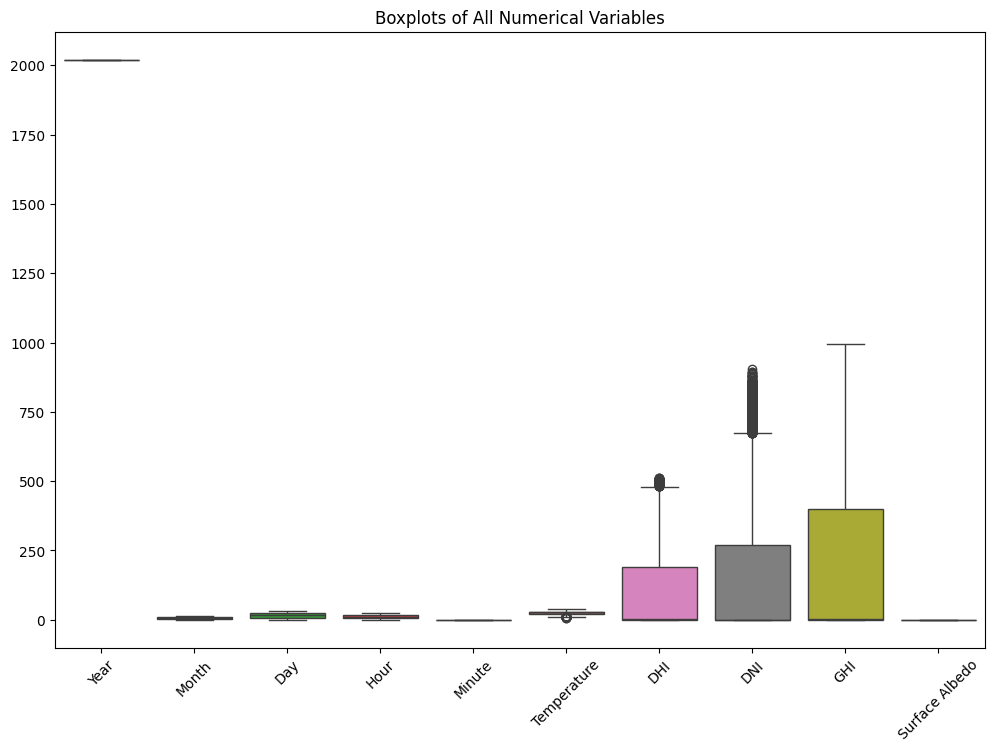

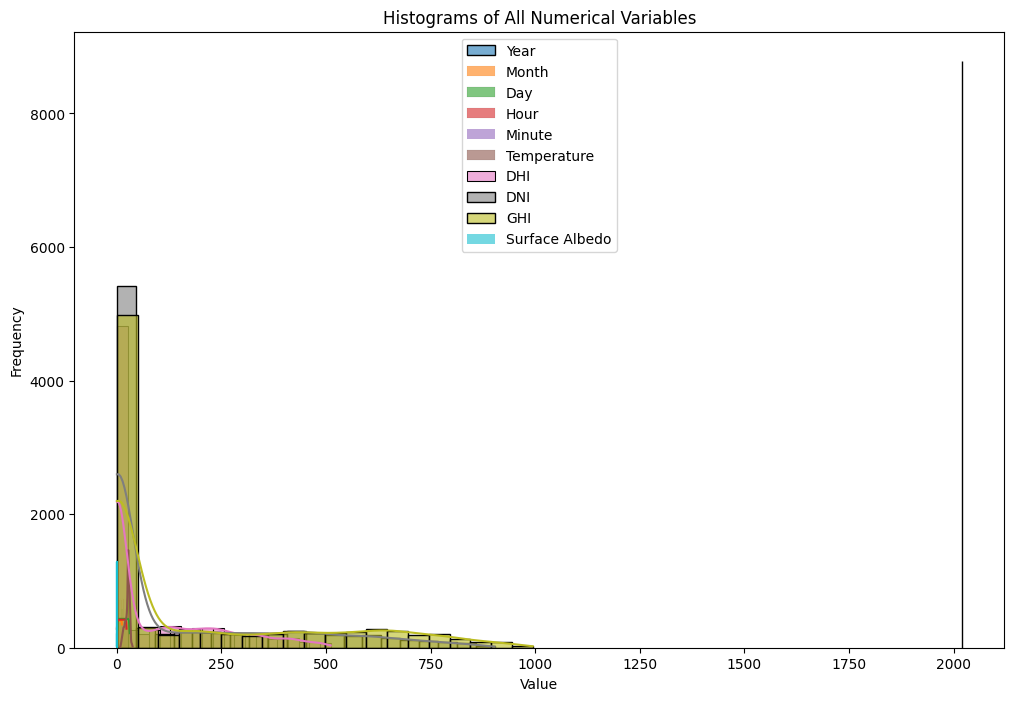


Normalized data preview:
   Year  Month  Day  Hour  Minute  Temperature  DHI  DNI  GHI  Surface Albedo  \
0  2020      1    1     0       0     0.185811  0.0  0.0  0.0             0.2   
1  2020      1    1     1       0     0.168919  0.0  0.0  0.0             0.2   
2  2020      1    1     2       0     0.152027  0.0  0.0  0.0             0.2   
3  2020      1    1     3       0     0.135135  0.0  0.0  0.0             0.2   
4  2020      1    1     4       0     0.121622  0.0  0.0  0.0             0.2   

   Cloud Type   City  
0           0  Dhaka  
1           0  Dhaka  
2           0  Dhaka  
3           0  Dhaka  
4           0  Dhaka  

Preprocessed dataset saved as 'Preprocessed_Dhaka.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
from IPython import get_ipython
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Upload the file
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]  # Assuming only one file is uploaded
city_name = file_name.split(".")[0]  # Extract city name from file name

# Load the dataset
df = pd.read_csv(file_name)

# Add a new column for the city name
df["City"] = city_name

# Display the first few rows
print("Initial data preview:")
print(df.head())

# Check for missing values
print("\nMissing values before preprocessing:")
print(df.isnull().sum())

# Fill missing numerical values with the mean
# Select only numerical columns for calculating the mean
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Check for missing values again
print("\nMissing values after filling:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Visualize data distribution
# Boxplots for all numerical columns
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
numerical_columns.remove("Cloud Type")  # Exclude categorical column for boxplots if exists
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns])
plt.title("Boxplots of All Numerical Variables")
plt.xticks(rotation=45)
plt.show()

# Histograms for all numerical columns
plt.figure(figsize=(12, 8))
for column in numerical_columns:
    sns.histplot(df[column], kde=True, bins=20, label=column, alpha=0.6)
plt.title("Histograms of All Numerical Variables")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Normalize numerical columns (excluding categorical ones)
scaler = MinMaxScaler()
columns_to_normalize = ['Temperature', 'DHI', 'DNI', 'GHI', 'Surface Albedo']
# Make sure these columns exist in your DataFrame
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Encode categorical variables (e.g., Cloud Type)
if 'Cloud Type' in df.columns and df['Cloud Type'].dtype != 'int64' and df['Cloud Type'].dtype != 'float64':
    df['Cloud Type'] = df['Cloud Type'].astype('category').cat.codes

# Display normalized data preview
print("\nNormalized data preview:")
print(df.head())

# Save the preprocessed dataset
preprocessed_file_name = f"Preprocessed_{file_name}"
df.to_csv(preprocessed_file_name, index=False)
print(f"\nPreprocessed dataset saved as '{preprocessed_file_name}'.")

# Download the file
files.download(preprocessed_file_name)